2.4

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from skleHeart failure2.csvarn import tree

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
RANDOM_STATE = 1
np.random.seed(RANDOM_STATE)

In [4]:
df1= pd.read_csv("heart_failure_clinical_records_dataset 1.csv")
df2= pd.read_csv("Heart failure2.csv")

In [5]:
df2.head()

,Patient's id,smoking
0,PA1,No
1,PA2,No
2,PA3,Yes
3,PA4,No
4,PA5,No


In [6]:
df1.head()


,Patient's id,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,time,DEATH_EVENT
0,PA1,75.0,0,582.0,0,20,1,265000.0,1.9,130,1,4,1
1,PA2,55.0,0,NaN,0,38,0,NaN,1.1,136,1,6,1
2,PA3,65.0,0,146.0,0,20,0,162000.0,1.3,129,1,7,1
3,PA4,50.0,1,111.0,0,20,0,210000.0,1.9,137,1,7,1
4,PA5,65.0,1,160.0,1,20,0,327000.0,2.7,116,0,8,1


In [7]:
df1.columns

Index(['Patient's id', 'age', 'anaemia', 'creatinine_phosphokinase',
       'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'time', 'DEATH_EVENT'],
      dtype='object')

In [8]:
df1.shape

(299, 13)

In [9]:
df2.head()

,Patient's id,smoking
0,PA1,No
1,PA2,No
2,PA3,Yes
3,PA4,No
4,PA5,No


In [10]:
df2.columns

Index(['Patient's id', 'smoking'], dtype='object')

In [11]:
df2.shape

(299, 2)

In [12]:
df1.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,time,DEATH_EVENT
count,299.000000,299.000000,298.000000,299.000000,299.000000,299.000000,297.000000,299.00000,299.000000,299.000000,299.000000,299.00000
mean,60.833893,0.431438,557.412752,0.418060,38.083612,0.351171,262931.625320,1.39388,136.625418,0.648829,130.260870,0.32107
std,11.894809,0.496107,875.000087,0.494067,11.834841,0.478136,97856.712298,1.03451,4.412477,0.478136,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,4.000000,0.00000
25%,51.000000,0.000000,115.750000,0.000000,30.000000,0.000000,212000.000000,0.90000,134.000000,0.000000,73.000000,0.00000
50%,60.000000,0.000000,249.500000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303000.000000,1.40000,140.000000,1.000000,203.000000,1.00000
max,95.000000,1.000000,7702.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,285.000000,1.00000


In [13]:
df2.describe()

,Patient's id,smoking
count,299,299
unique,299,2
top,PA143,No
freq,1,203


In [14]:
print(df1.isnull().values.any())

True


In [15]:
print(df1.isnull().sum().sum())


3


In [16]:
for col in df1.columns:
    print(col, str(round(100* df1[col].isnull().sum() / len(df1), 2)) + '%')

Patient's id 0.0%
age 0.0%
anaemia 0.0%
creatinine_phosphokinase 0.33%
diabetes 0.0%
ejection_fraction 0.0%
high_blood_pressure 0.0%
platelets 0.67%
serum_creatinine 0.0%
serum_sodium 0.0%
sex 0.0%
time 0.0%
DEATH_EVENT 0.0%


In [17]:
df1.describe(percentiles=[.10,.5,.90])

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,time,DEATH_EVENT
count,299.000000,299.000000,298.000000,299.000000,299.000000,299.000000,297.000000,299.00000,299.000000,299.000000,299.000000,299.00000
mean,60.833893,0.431438,557.412752,0.418060,38.083612,0.351171,262931.625320,1.39388,136.625418,0.648829,130.260870,0.32107
std,11.894809,0.496107,875.000087,0.494067,11.834841,0.478136,97856.712298,1.03451,4.412477,0.478136,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,4.000000,0.00000
10%,45.000000,0.000000,67.400000,0.000000,25.000000,0.000000,153000.000000,0.80000,132.000000,0.000000,26.800000,0.00000
50%,60.000000,0.000000,249.500000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,115.000000,0.00000
90%,75.400000,1.000000,1199.900000,1.000000,60.000000,1.000000,372200.000000,2.10000,141.200000,1.000000,244.000000,1.00000
max,95.000000,1.000000,7702.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,285.000000,1.00000


In [18]:
df3=df1[["age","creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine","serum_sodium","time"]]
df4=df1[["anaemia","diabetes","high_blood_pressure","sex","DEATH_EVENT"]]

In [19]:
df3.head()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
0,75.0,582.0,20,265000.0,1.9,130,4
1,55.0,NaN,38,NaN,1.1,136,6
2,65.0,146.0,20,162000.0,1.3,129,7
3,50.0,111.0,20,210000.0,1.9,137,7
4,65.0,160.0,20,327000.0,2.7,116,8


In [20]:
df4.head()

,anaemia,diabetes,high_blood_pressure,sex,DEATH_EVENT
0,0,0,1,1,1
1,0,0,0,1,1
2,0,0,0,1,1
3,1,0,0,1,1
4,1,1,0,0,1


In [21]:
scaler = MinMaxScaler()
df3 = pd.DataFrame(scaler.fit_transform(df3),
            columns=df3.columns, index=df3.index)

In [22]:
df3.head()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
0,0.636364,0.072796,0.090909,0.290823,0.157303,0.485714,0.000000
1,0.272727,NaN,0.363636,NaN,0.067416,0.657143,0.007117
2,0.454545,0.016018,0.090909,0.165960,0.089888,0.457143,0.010676
3,0.181818,0.011460,0.090909,0.224148,0.157303,0.685714,0.010676
4,0.454545,0.017841,0.090909,0.365984,0.247191,0.085714,0.014235


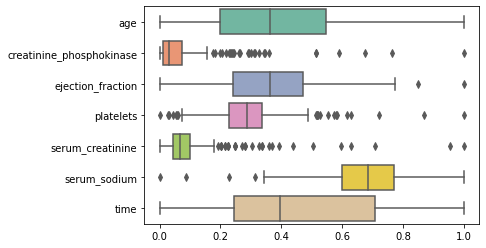

In [23]:
ax = sns.boxplot(data=df3, orient="h", palette="Set2")

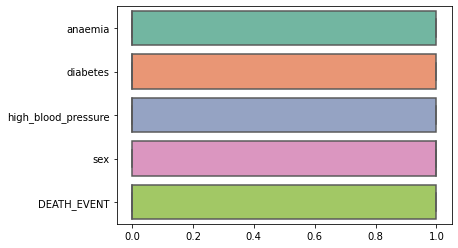

In [24]:
ax = sns.boxplot(data=df4, orient="h", palette="Set2")

In [25]:
df_before_preprocessing= pd.concat([df1["age"],df3,df4],axis=1)

In [26]:
for col in df3.columns:
  median = df3[col].median()
  df3[col].fillna(median, inplace=True)
else:
  print("Finally finished!")
print(df3.isnull().values.any())

Finally finished!
False


In [27]:
print(df3.isnull().values.any())

False


In [28]:
for col in df3.columns:
    print(col, str(round(100* df3[col].isnull().sum() / len(df3), 2)) + '%')

age 0.0%
creatinine_phosphokinase 0.0%
ejection_fraction 0.0%
platelets 0.0%
serum_creatinine 0.0%
serum_sodium 0.0%
time 0.0%


In [29]:
df3.head()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
0,0.636364,0.072796,0.090909,0.290823,0.157303,0.485714,0.000000
1,0.272727,0.029496,0.363636,0.287186,0.067416,0.657143,0.007117
2,0.454545,0.016018,0.090909,0.165960,0.089888,0.457143,0.010676
3,0.181818,0.011460,0.090909,0.224148,0.157303,0.685714,0.010676
4,0.454545,0.017841,0.090909,0.365984,0.247191,0.085714,0.014235


In [30]:
df3.describe(percentiles=[.10,.5,.90])

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000
mean,0.378798,0.069460,0.364903,0.288308,0.100436,0.675012,0.449327
std,0.216269,0.113779,0.179316,0.118230,0.116237,0.126071,0.276207
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10%,0.090909,0.005808,0.166667,0.155049,0.033708,0.542857,0.081139
50%,0.363636,0.029496,0.363636,0.287186,0.067416,0.685714,0.395018
90%,0.643636,0.153223,0.696970,0.420051,0.179775,0.805714,0.854093
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [31]:
#replacing outliers and extreams with null values
df3.loc[df3.platelets > 0.9, 'platelets'] = np.nan
df3.loc[df3.creatinine_phosphokinase > 0.9, 'creatinine_phosphokinase'] = np.nan
df3.loc[df3.ejection_fraction > 0.9, 'ejection_fraction'] = np.nan
df3.loc[df3.serum_creatinine > 0.9, 'serum_creatinine'] = np.nan
df3.loc[df3.serum_sodium < 0.1, 'serum_sodium'] = np.nan

In [32]:
# replacing null values with median
for col in df3.columns:
  median = df3[col].median()
  df3[col].fillna(median, inplace=True)
else:
  print("Finally finished!")
print(df3.isnull().values.any())

Finally finished!
False


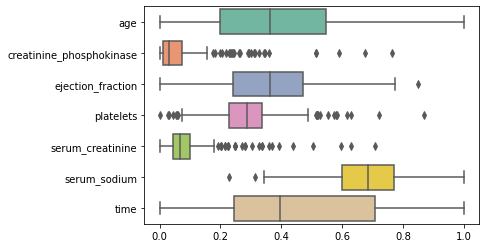

In [33]:
ax = sns.boxplot(data=df3, orient="h", palette="Set2")

In [34]:
df3=df3.drop(['age'],axis=1)
df= pd.concat([df1[["Patient's id","age"]],df3,df4],axis=1)
df.head()

,Patient's id,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,anaemia,diabetes,high_blood_pressure,sex,DEATH_EVENT
0,PA1,75.0,0.072796,0.090909,0.290823,0.157303,0.485714,0.000000,0,0,1,1,1
1,PA2,55.0,0.029496,0.363636,0.287186,0.067416,0.657143,0.007117,0,0,0,1,1
2,PA3,65.0,0.016018,0.090909,0.165960,0.089888,0.457143,0.010676,0,0,0,1,1
3,PA4,50.0,0.011460,0.090909,0.224148,0.157303,0.685714,0.010676,1,0,0,1,1
4,PA5,65.0,0.017841,0.090909,0.365984,0.247191,0.685714,0.014235,1,1,0,0,1


In [35]:
from pandas.api.types import CategoricalDtype
classes = df2['smoking'].unique()
smoke_types = CategoricalDtype(categories=classes)
df2['smoking'] = df2['smoking'].astype(smoke_types).cat.codes.astype('long')
df2.head()

,Patient's id,smoking
0,PA1,0
1,PA2,0
2,PA3,1
3,PA4,0
4,PA5,0


In [36]:
df = df.merge(df2, on="Patient's id")

In [37]:
df.head()

,Patient's id,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,anaemia,diabetes,high_blood_pressure,sex,DEATH_EVENT,smoking
0,PA1,75.0,0.072796,0.090909,0.290823,0.157303,0.485714,0.000000,0,0,1,1,1,0
1,PA2,55.0,0.029496,0.363636,0.287186,0.067416,0.657143,0.007117,0,0,0,1,1,0
2,PA3,65.0,0.016018,0.090909,0.165960,0.089888,0.457143,0.010676,0,0,0,1,1,1
3,PA4,50.0,0.011460,0.090909,0.224148,0.157303,0.685714,0.010676,1,0,0,1,1,0
4,PA5,65.0,0.017841,0.090909,0.365984,0.247191,0.685714,0.014235,1,1,0,0,1,0


In [38]:

#df = merged.drop(["Patient's id"], axis=1)
df.head()

,Patient's id,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,anaemia,diabetes,high_blood_pressure,sex,DEATH_EVENT,smoking
0,PA1,75.0,0.072796,0.090909,0.290823,0.157303,0.485714,0.000000,0,0,1,1,1,0
1,PA2,55.0,0.029496,0.363636,0.287186,0.067416,0.657143,0.007117,0,0,0,1,1,0
2,PA3,65.0,0.016018,0.090909,0.165960,0.089888,0.457143,0.010676,0,0,0,1,1,1
3,PA4,50.0,0.011460,0.090909,0.224148,0.157303,0.685714,0.010676,1,0,0,1,1,0
4,PA5,65.0,0.017841,0.090909,0.365984,0.247191,0.685714,0.014235,1,1,0,0,1,0


In [39]:
df=df.sort_values(by=['age'])
df.head()

,Patient's id,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,anaemia,diabetes,high_blood_pressure,sex,DEATH_EVENT,smoking
269,PA270,40.0,0.072796,0.318182,0.238696,0.056180,0.542857,0.854093,0,1,0,1,0,0
232,PA233,40.0,0.013804,0.318182,0.278700,0.044944,0.685714,0.729537,1,0,0,1,0,0
180,PA181,40.0,0.059253,0.242424,0.336889,0.044944,0.657143,0.512456,0,1,0,1,0,0
242,PA243,40.0,0.008725,0.318182,0.278700,0.067416,0.657143,0.740214,0,0,0,1,0,1
248,PA249,40.0,0.078265,0.318182,0.334465,0.056180,0.828571,0.747331,0,0,0,1,0,1


In [40]:
df.tail()

,Patient's id,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,anaemia,diabetes,high_blood_pressure,sex,DEATH_EVENT,smoking
36,PA37,90.0,0.004818,0.545455,0.243545,0.056180,0.600000,0.092527,1,1,0,1,1,0
5,PA6,90.0,0.003125,0.393939,0.216875,0.179775,0.542857,0.014235,1,0,1,1,1,1
30,PA31,94.0,0.072796,0.363636,0.288833,0.149438,0.600000,0.081851,0,1,1,1,1,0
55,PA56,95.0,0.045318,0.242424,0.528428,0.168539,0.542857,0.163701,1,0,0,1,1,0
26,PA27,95.0,0.011590,0.393939,0.207177,0.056180,0.714286,0.071174,1,0,1,0,1,0


In [41]:

df= df.drop(["Patient's id"], axis=1)


In [42]:
df.head()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,anaemia,diabetes,high_blood_pressure,sex,DEATH_EVENT,smoking
269,40.0,0.072796,0.318182,0.238696,0.056180,0.542857,0.854093,0,1,0,1,0,0
232,40.0,0.013804,0.318182,0.278700,0.044944,0.685714,0.729537,1,0,0,1,0,0
180,40.0,0.059253,0.242424,0.336889,0.044944,0.657143,0.512456,0,1,0,1,0,0
242,40.0,0.008725,0.318182,0.278700,0.067416,0.657143,0.740214,0,0,0,1,0,1
248,40.0,0.078265,0.318182,0.334465,0.056180,0.828571,0.747331,0,0,0,1,0,1


AxesSubplot(0.125,0.125;0.62x0.755)


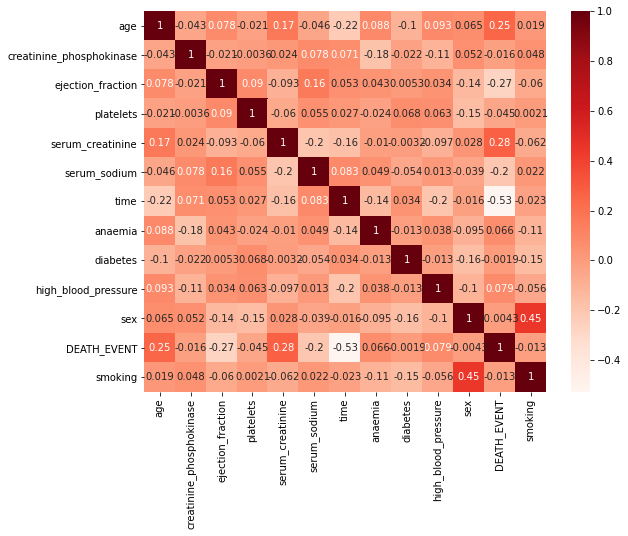

In [43]:
plt.figure(figsize=(9,7))
print (sns.heatmap(df.corr(), cmap='Reds', annot=True))

In [44]:
y1 = df['DEATH_EVENT'] # output class
X1 = df.drop(['DEATH_EVENT'], axis=1)# input features
print(X1.shape, y1.shape)

(299, 12) (299,)


In [45]:
import seaborn as sns
import matplotlib as pl
corelation = df.corr
#plt.figure(figsize =(10,6))
#sns.heatmap(corelation,annot = True)

In [46]:
# using decison tree classifier to select the importand features
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=RANDOM_STATE)
model.fit(X1, y1)

DecisionTreeClassifier(random_state=1)

age Score: 0.01878
creatinine_phosphokinase Score: 0.10854
ejection_fraction Score: 0.12518
platelets Score: 0.04910
serum_creatinine Score: 0.07981
serum_sodium Score: 0.05085
time Score: 0.48033
anaemia Score: 0.02192
diabetes Score: 0.01973
high_blood_pressure Score: 0.00000
sex Score: 0.04219
smoking Score: 0.00358


<BarContainer object of 12 artists>

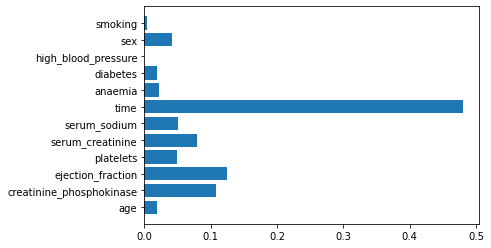

In [47]:
# get importance of each feature 
importance = model.feature_importances_
# summarize feature importance
i=0
for col in X1.columns:
    #print(col,importance[i])
    print(col,'Score: %.5f' % (importance[i]))
    i=i+1
plt.barh(X1.columns,importance)

In [48]:
X1=X1.drop(['smoking','high_blood_pressure'], axis=1)

In [49]:
X1.head()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,anaemia,diabetes,sex
269,40.0,0.072796,0.318182,0.238696,0.056180,0.542857,0.854093,0,1,1
232,40.0,0.013804,0.318182,0.278700,0.044944,0.685714,0.729537,1,0,1
180,40.0,0.059253,0.242424,0.336889,0.044944,0.657143,0.512456,0,1,1
242,40.0,0.008725,0.318182,0.278700,0.067416,0.657143,0.740214,0,0,1
248,40.0,0.078265,0.318182,0.334465,0.056180,0.828571,0.747331,0,0,1


In [50]:
y = y1.to_numpy()
X = X1.to_numpy()
print(X.shape, y.shape)

(299, 10) (299,)


Counter({0: 203, 1: 96})


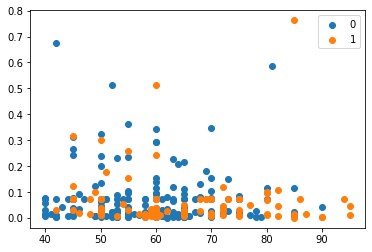

In [51]:

#imbalanced classification dataset
from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot
from numpy import where
# summarize class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class death_event
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

In [52]:
from imblearn.over_sampling import SMOTE
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

Counter({0: 203, 1: 203})


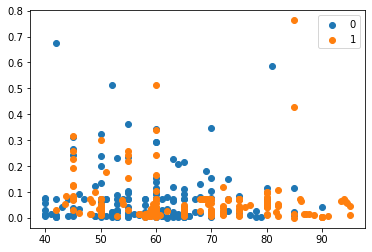

In [53]:
# summarize the new class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

In [54]:
print(X.shape,y.shape)

(406, 10) (406,)


7.1- selecting the split

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RANDOM_STATE)
clf = DecisionTreeClassifier(random_state=RANDOM_STATE)
clf.fit(X_train, y_train)
print("score on test: "  + str(clf.score(X_test, y_test)))
print("score on train: " + str(clf.score(X_train, y_train)))

score on test: 0.819672131147541
score on train: 1.0


In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=RANDOM_STATE)
clf = DecisionTreeClassifier(random_state=RANDOM_STATE)
clf.fit(X_train, y_train)
print("score on test: "  + str(clf.score(X_test, y_test)))
print("score on train: " + str(clf.score(X_train, y_train)))

score on test: 0.7843137254901961
score on train: 1.0


In [57]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)
clf = DecisionTreeClassifier(random_state=RANDOM_STATE)
clf.fit(X_train, y_train)
print("score on test: "  + str(clf.score(X_test, y_test)))
print("score on train: " + str(clf.score(X_train, y_train)))

score on test: 0.8536585365853658
score on train: 1.0


In [58]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB().fit(X_train, y_train)
print("score on test: " + str(mnb.score(X_test, y_test)))
print("score on train: "+ str(mnb.score(X_train, y_train)))

score on test: 0.7926829268292683
score on train: 0.808641975308642


In [59]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
print("score on test: " + str(lr.score(X_test, y_test)))
print("score on train: "+ str(lr.score(X_train, y_train)))

score on test: 0.8048780487804879
score on train: 0.8209876543209876


In [60]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(algorithm = 'brute', n_jobs=-1)
knn.fit(X_train, y_train)
print("train shape: " + str(X_train.shape))
print("score on test: " + str(knn.score(X_test, y_test)))
print("score on train: "+ str(knn.score(X_train, y_train)))

train shape: (324, 10)
score on test: 0.6951219512195121
score on train: 0.8148148148148148


In [61]:
from sklearn.svm import LinearSVC
svm=LinearSVC(C=0.0001)
svm.fit(X_train, y_train)
print("score on test: " + str(svm.score(X_test, y_test)))
print("score on train: "+ str(svm.score(X_train, y_train)))

score on test: 0.5
score on train: 0.5


In [62]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=RANDOM_STATE)
clf.fit(X_train, y_train)
print("score on test: "  + str(clf.score(X_test, y_test)))
print("score on train: " + str(clf.score(X_train, y_train)))

score on test: 0.8536585365853658
score on train: 1.0


In [63]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
# max_samples: maximum size 0.5=50% of each sample taken from the full dataset
# max_features: maximum of features 1=100% taken here all 10K 
# n_estimators: number of decision trees 
bg=BaggingClassifier(DecisionTreeClassifier(random_state=RANDOM_STATE),max_samples=0.5,max_features=1.0,n_estimators=10,random_state=RANDOM_STATE)
bg.fit(X_train, y_train)
print("score on test: " + str(bg.score(X_test, y_test)))
print("score on train: "+ str(bg.score(X_train, y_train)))

score on test: 0.8780487804878049
score on train: 0.941358024691358


In [64]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
adb = AdaBoostClassifier(DecisionTreeClassifier(min_samples_split=10,max_depth= 4),n_estimators=10,learning_rate=0.6,random_state=RANDOM_STATE)
adb.fit(X_train, y_train)
print("score on test: " + str(adb.score(X_test, y_test)))
print("score on train: "+ str(adb.score(X_train, y_train)))

score on test: 0.9024390243902439
score on train: 1.0


In [65]:
from sklearn.ensemble import RandomForestClassifier
# n_estimators = number of decision trees
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
print("score on test: " + str(rf.score(X_test, y_test)))
print("score on train: "+ str(rf.score(X_train, y_train)))

score on test: 0.9146341463414634
score on train: 1.0


In [66]:
from sklearn.ensemble import VotingClassifier
# 1) naive bias = mnb
# 2) logistic regression =lr
# 3) random forest =rf
# 4) support vector machine = svm
evc=VotingClassifier(estimators=[('mnb',mnb),('lr',lr),('rf',rf),('svm',svm)],voting='hard')
evc.fit(X_train, y_train)
print("score on test: " + str(evc.score(X_test, y_test)))
print("score on train: "+ str(evc.score(X_train, y_train)))

score on test: 0.8048780487804879
score on train: 0.8487654320987654


depth: 1
Accuracy gini: 0.7926829268292683
Accuracy etropy: 0.7926829268292683
depth: 2
Accuracy gini: 0.8780487804878049
Accuracy etropy: 0.7926829268292683
depth: 3
Accuracy gini: 0.9024390243902439
Accuracy etropy: 0.9024390243902439
depth: 4
Accuracy gini: 0.926829268292683
Accuracy etropy: 0.8902439024390244
depth: 5
Accuracy gini: 0.9146341463414634
Accuracy etropy: 0.8902439024390244
depth: 6
Accuracy gini: 0.9024390243902439
Accuracy etropy: 0.8658536585365854
depth: 7
Accuracy gini: 0.8780487804878049
Accuracy etropy: 0.8414634146341463
depth: 8
Accuracy gini: 0.8780487804878049
Accuracy etropy: 0.7804878048780488
depth: 9
Accuracy gini: 0.8658536585365854
Accuracy etropy: 0.7682926829268293


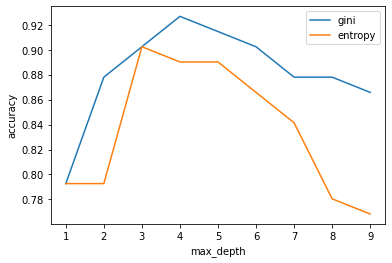

In [67]:
from sklearn.metrics import accuracy_score
#This piece of code is to check how accuracy varies by increasing tree depth. This will help us pick max_depth hyperparameter. 
max_depth = []
acc_gini = []
acc_entropy = []
for i in range(1,10):
 dtree = DecisionTreeClassifier(criterion='gini', max_depth=i, random_state=RANDOM_STATE)
 dtree.fit(X_train, y_train)
 pred = dtree.predict(X_test)
 Accuracy= accuracy_score(y_test, pred)
 print("depth:",i )
 print("Accuracy gini:",Accuracy)
 acc_gini.append(accuracy_score(y_test, pred))
 ####
 dtree = DecisionTreeClassifier(criterion='entropy', max_depth=i, random_state=RANDOM_STATE)
 dtree.fit(X_train, y_train)
 pred = dtree.predict(X_test)
 Accuracy= accuracy_score(y_test, pred)
 #print("depth:",i )
 print("Accuracy etropy:",Accuracy)
 acc_entropy.append(accuracy_score(y_test, pred))
 ####
 max_depth.append(i)
 d = pd.DataFrame({'acc_gini':pd.Series(acc_gini), 
 'acc_entropy':pd.Series(acc_entropy),
 'max_depth':pd.Series(max_depth)})
# visualizing changes in parameters
plt.plot('max_depth','acc_gini', data=d, label='gini')
plt.plot('max_depth','acc_entropy', data=d, label='entropy')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()

n_estimators: 1
Accuracy: 0.8292682926829268
n_estimators: 2
Accuracy: 0.8658536585365854
n_estimators: 3
Accuracy: 0.8780487804878049
n_estimators: 4
Accuracy: 0.8902439024390244
n_estimators: 5
Accuracy: 0.9146341463414634
n_estimators: 6
Accuracy: 0.926829268292683
n_estimators: 7
Accuracy: 0.9146341463414634
n_estimators: 8
Accuracy: 0.926829268292683
n_estimators: 9
Accuracy: 0.9390243902439024
n_estimators: 10
Accuracy: 0.926829268292683
n_estimators: 11
Accuracy: 0.9512195121951219
n_estimators: 12
Accuracy: 0.9512195121951219
n_estimators: 13
Accuracy: 0.9512195121951219
n_estimators: 14
Accuracy: 0.9512195121951219
n_estimators: 15
Accuracy: 0.9634146341463414
n_estimators: 16
Accuracy: 0.9390243902439024
n_estimators: 17
Accuracy: 0.9512195121951219
n_estimators: 18
Accuracy: 0.9390243902439024
n_estimators: 19
Accuracy: 0.9390243902439024


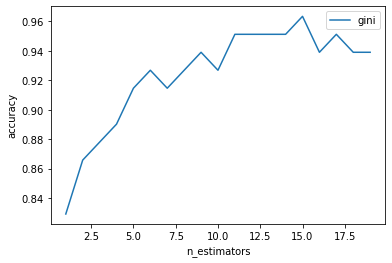

In [68]:
from sklearn.metrics import accuracy_score
acc_entropy = []
n_estimators=[]
for i in range(1,20):
 #model = DecisionTreeClassifier(criterion='entropy', max_depth=i)
 model= RandomForestClassifier(n_estimators=i,criterion='gini',random_state=RANDOM_STATE)
 model.fit(X_train, y_train)
 pred = model.predict(X_test)
 Accuracy= accuracy_score(y_test, pred)
 acc_entropy.append(accuracy_score(y_test, pred))
 print("n_estimators:",i )
 print("Accuracy:",Accuracy)
 ####
 n_estimators.append(i)
d = pd.DataFrame({'acc_entropy':pd.Series(acc_entropy),
 'n_estimators':pd.Series(n_estimators)})
# visualizing changes in parameters
#plt.plot('max_depth','acc_gini', data=d, label='gini')
plt.plot('n_estimators','acc_entropy', data=d, label='gini')
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.legend()

max_depth: 1
Accuracy: 0.8536585365853658
max_depth: 2
Accuracy: 0.8536585365853658
max_depth: 3
Accuracy: 0.8902439024390244
max_depth: 4
Accuracy: 0.8902439024390244
max_depth: 5
Accuracy: 0.9024390243902439
max_depth: 6
Accuracy: 0.8902439024390244
max_depth: 7
Accuracy: 0.9512195121951219
max_depth: 8
Accuracy: 0.9146341463414634
max_depth: 9
Accuracy: 0.9512195121951219
max_depth: 10
Accuracy: 0.9512195121951219
max_depth: 11
Accuracy: 0.9634146341463414
max_depth: 12
Accuracy: 0.9512195121951219
max_depth: 13
Accuracy: 0.9634146341463414
max_depth: 14
Accuracy: 0.9634146341463414
max_depth: 15
Accuracy: 0.9634146341463414
max_depth: 16
Accuracy: 0.9634146341463414
max_depth: 17
Accuracy: 0.9634146341463414
max_depth: 18
Accuracy: 0.9634146341463414
max_depth: 19
Accuracy: 0.9634146341463414


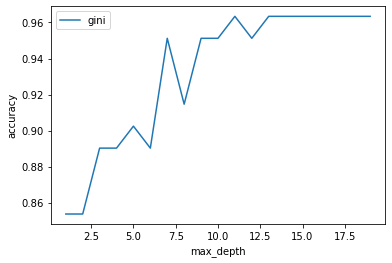

In [69]:
from sklearn.metrics import accuracy_score
acc_entropy = []
max_depth=[]
for i in range(1,20):
 #model = DecisionTreeClassifier(criterion='entropy', max_depth=i)
 model= RandomForestClassifier(n_estimators=15,criterion='gini',random_state=RANDOM_STATE,max_depth= i)
 model.fit(X_train, y_train)
 pred = model.predict(X_test)
 Accuracy= accuracy_score(y_test, pred)
 acc_entropy.append(accuracy_score(y_test, pred))
 print("max_depth:",i )
 print("Accuracy:",Accuracy)
 ####
 max_depth.append(i)
d = pd.DataFrame({'acc_entropy':pd.Series(acc_entropy),
 'max_depth':pd.Series(max_depth)})
# visualizing changes in parameters
#plt.plot('max_depth','acc_gini', data=d, label='gini')
plt.plot('max_depth','acc_entropy', data=d, label='gini')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()

n_estimators: 1
Accuracy: 0.926829268292683
n_estimators: 2
Accuracy: 0.926829268292683
n_estimators: 3
Accuracy: 0.926829268292683
n_estimators: 4
Accuracy: 0.9390243902439024
n_estimators: 5
Accuracy: 0.8902439024390244
n_estimators: 6
Accuracy: 0.8902439024390244
n_estimators: 7
Accuracy: 0.9024390243902439
n_estimators: 8
Accuracy: 0.8780487804878049
n_estimators: 9
Accuracy: 0.9024390243902439
n_estimators: 10
Accuracy: 0.9024390243902439
n_estimators: 11
Accuracy: 0.8780487804878049
n_estimators: 12
Accuracy: 0.8780487804878049
n_estimators: 13
Accuracy: 0.8780487804878049
n_estimators: 14
Accuracy: 0.8780487804878049
n_estimators: 15
Accuracy: 0.8780487804878049
n_estimators: 16
Accuracy: 0.8780487804878049
n_estimators: 17
Accuracy: 0.8780487804878049
n_estimators: 18
Accuracy: 0.8902439024390244
n_estimators: 19
Accuracy: 0.8658536585365854


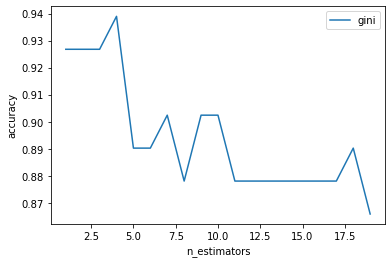

In [70]:
acc_entropy = []
n_estimators=[]
for i in range(1,20):
 model= AdaBoostClassifier(DecisionTreeClassifier(max_depth= 4),n_estimators=i,random_state=RANDOM_STATE)
 model.fit(X_train, y_train)
 pred = model.predict(X_test)
 Accuracy= accuracy_score(y_test, pred)
 acc_entropy.append(accuracy_score(y_test, pred))
 print("n_estimators:",i )
 print("Accuracy:",Accuracy)
 ####
 n_estimators.append(i)
d = pd.DataFrame({'acc_entropy':pd.Series(acc_entropy),
 'n_estimators':pd.Series(n_estimators)})
# visualizing changes in parameters
#plt.plot('max_depth','acc_gini', data=d, label='gini')
plt.plot('n_estimators','acc_entropy', data=d, label='gini')
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.legend()

7.2 Data mining and 7.3 Output and patterns

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=4),
                   n_estimators=4, random_state=1)
The accuracy of model AdaBoostClassifier is 0.94
Accuracy on train set: 0.99
Accuracy on test set: 0.94
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        41
           1       0.93      0.95      0.94        41

    accuracy                           0.94        82
   macro avg       0.94      0.94      0.94        82
weighted avg       0.94      0.94      0.94        82



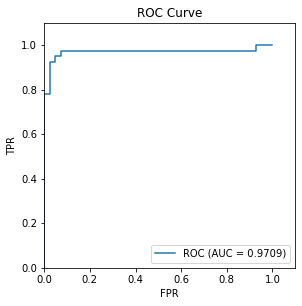



RandomForestClassifier(max_depth=13, n_estimators=15, random_state=1)
The accuracy of model RandomForestClassifier is 0.96
Accuracy on train set: 1.00
Accuracy on test set: 0.96
              precision    recall  f1-score   support

           0       0.95      0.98      0.96        41
           1       0.97      0.95      0.96        41

    accuracy                           0.96        82
   macro avg       0.96      0.96      0.96        82
weighted avg       0.96      0.96      0.96        82



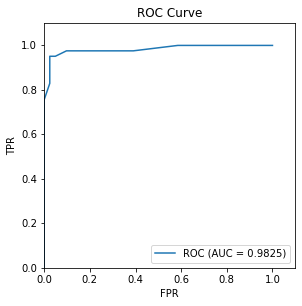



DecisionTreeClassifier(max_depth=4, random_state=1)
The accuracy of model DecisionTreeClassifier is 0.93
Accuracy on train set: 0.90
Accuracy on test set: 0.93
              precision    recall  f1-score   support

           0       0.95      0.90      0.92        41
           1       0.91      0.95      0.93        41

    accuracy                           0.93        82
   macro avg       0.93      0.93      0.93        82
weighted avg       0.93      0.93      0.93        82



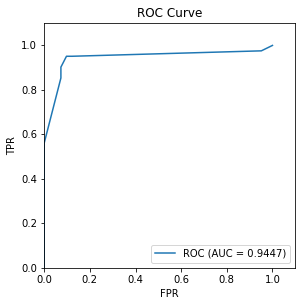

In [71]:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score

DT= DecisionTreeClassifier(random_state=RANDOM_STATE, criterion="gini",max_depth= 4) # using the random state for reproducibility
AB= AdaBoostClassifier(DecisionTreeClassifier(max_depth= 4),n_estimators= 4,random_state=RANDOM_STATE)
RF= RandomForestClassifier(n_estimators=15, random_state=RANDOM_STATE,criterion='gini',max_depth=13)


# now, create a list with the models 
models= [AB,RF,DT]

for model in models:
    print(model)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)# selected split 80:20
    model.fit(X_train, y_train)
    y_pred= model.predict(X_test) # then predict on the test set
    accuracy= accuracy_score(y_test, y_pred) # this gives us how often the algorithm predicted correctly
    clf_report= classification_report(y_test, y_pred) # with the report, we have a bigger picture, with precision and recall for each class
    print(f"The accuracy of model {type(model).__name__} is {accuracy:.2f}")
    score = model.score(X_train, y_train)
    print('Accuracy on train set: {:.2f}'.format(score))
    score = model.score(X_test, y_test)
    print('Accuracy on test set: {:.2f}'.format(score))
    print(clf_report)
    proba = model.predict_proba(X_test)
    fpr, tpr, threshold = roc_curve(y_test, proba[:, 1])
    auc_score = roc_auc_score(y_test, proba[:, 1])
    plt.figure(figsize=(4.5, 4.5))
    plt.xlim(0., 1.1)
    plt.ylim(0., 1.1)
    plt.plot(fpr, tpr, label='ROC (AUC = %0.4f)' % auc_score)
    plt.legend(loc='lower right')
    plt.title("ROC Curve")
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.show()
    print("\n")
#tree.plot_tree(model)
#plt.show()


Predict the mortality using only clinical parameters such as ejection fraction and serum creatine.

In [72]:
X=df[["ejection_fraction","serum_creatinine"]].to_numpy()
y = df['DEATH_EVENT'].to_numpy()# output class

In [73]:
print(X.shape, y.shape)

(299, 2) (299,)


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=4),
                   n_estimators=4, random_state=1)
The accuracy of model AdaBoostClassifier is 0.72
Accuracy on train set: 0.87
Accuracy on test set: 0.72
              precision    recall  f1-score   support

           0       0.77      0.82      0.80        40
           1       0.59      0.50      0.54        20

    accuracy                           0.72        60
   macro avg       0.68      0.66      0.67        60
weighted avg       0.71      0.72      0.71        60



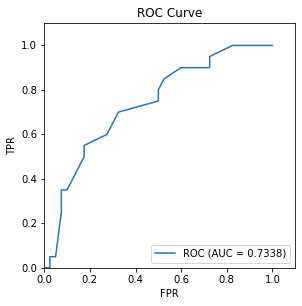



RandomForestClassifier(max_depth=13, n_estimators=15, random_state=1)
The accuracy of model RandomForestClassifier is 0.73
Accuracy on train set: 0.91
Accuracy on test set: 0.73
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        40
           1       0.60      0.60      0.60        20

    accuracy                           0.73        60
   macro avg       0.70      0.70      0.70        60
weighted avg       0.73      0.73      0.73        60



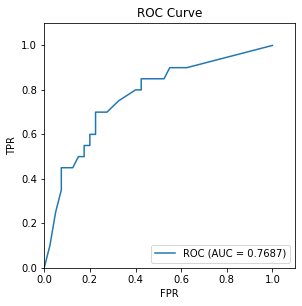



DecisionTreeClassifier(max_depth=4, random_state=1)
The accuracy of model DecisionTreeClassifier is 0.72
Accuracy on train set: 0.77
Accuracy on test set: 0.72
              precision    recall  f1-score   support

           0       0.76      0.85      0.80        40
           1       0.60      0.45      0.51        20

    accuracy                           0.72        60
   macro avg       0.68      0.65      0.66        60
weighted avg       0.70      0.72      0.70        60



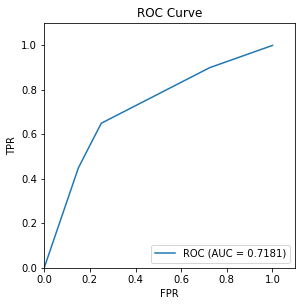

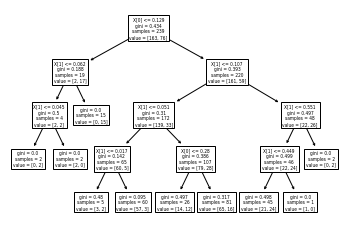

In [74]:
DT= DecisionTreeClassifier(random_state=RANDOM_STATE, criterion="gini",max_depth= 4) # using the random state for reproducibility
AB= AdaBoostClassifier(DecisionTreeClassifier(max_depth= 4),n_estimators= 4,random_state=RANDOM_STATE)
RF= RandomForestClassifier(n_estimators=15, random_state=RANDOM_STATE,criterion='gini',max_depth=13)


# now, create a list with the models 
models= [AB,RF,DT]

for model in models:
    print(model)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)# selected split 80:20
    model.fit(X_train, y_train)
    y_pred= model.predict(X_test) # then predict on the test set
    accuracy= accuracy_score(y_test, y_pred) # this gives us how often the algorithm predicted correctly
    clf_report= classification_report(y_test, y_pred) # with the report, we have a bigger picture, with precision and recall for each class
    print(f"The accuracy of model {type(model).__name__} is {accuracy:.2f}")
    score = model.score(X_train, y_train)
    print('Accuracy on train set: {:.2f}'.format(score))
    score = model.score(X_test, y_test)
    print('Accuracy on test set: {:.2f}'.format(score))
    print(clf_report)
    proba = model.predict_proba(X_test)
    fpr, tpr, threshold = roc_curve(y_test, proba[:, 1])
    auc_score = roc_auc_score(y_test, proba[:, 1])
    plt.figure(figsize=(4.5, 4.5))
    plt.xlim(0., 1.1)
    plt.ylim(0., 1.1)
    plt.plot(fpr, tpr, label='ROC (AUC = %0.4f)' % auc_score)
    plt.legend(loc='lower right')
    plt.title("ROC Curve")
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.show()
    print("\n")
tree.plot_tree(model)
plt.show()


In [75]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=4),
                   n_estimators=4, random_state=1)
The accuracy of model AdaBoostClassifier is 0.79
Accuracy on train set: 0.84
Accuracy on test set: 0.79
              precision    recall  f1-score   support

           0       0.79      0.80      0.80        41
           1       0.80      0.78      0.79        41

    accuracy                           0.79        82
   macro avg       0.79      0.79      0.79        82
weighted avg       0.79      0.79      0.79        82



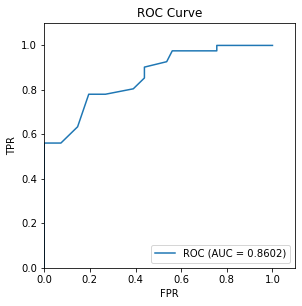



RandomForestClassifier(max_depth=13, n_estimators=15, random_state=1)
The accuracy of model RandomForestClassifier is 0.85
Accuracy on train set: 0.90
Accuracy on test set: 0.85
              precision    recall  f1-score   support

           0       0.81      0.93      0.86        41
           1       0.91      0.78      0.84        41

    accuracy                           0.85        82
   macro avg       0.86      0.85      0.85        82
weighted avg       0.86      0.85      0.85        82



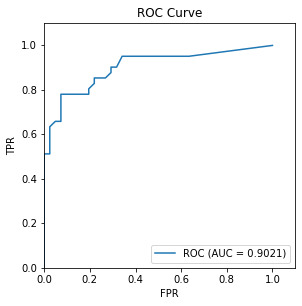



DecisionTreeClassifier(max_depth=4, random_state=1)
The accuracy of model DecisionTreeClassifier is 0.82
Accuracy on train set: 0.77
Accuracy on test set: 0.82
              precision    recall  f1-score   support

           0       0.74      0.98      0.84        41
           1       0.96      0.66      0.78        41

    accuracy                           0.82        82
   macro avg       0.85      0.82      0.81        82
weighted avg       0.85      0.82      0.81        82



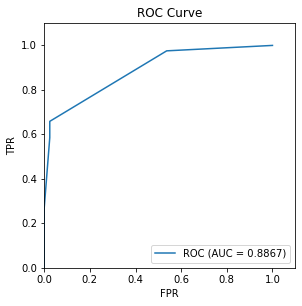

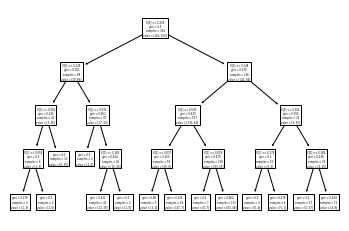

In [76]:
DT= DecisionTreeClassifier(random_state=RANDOM_STATE, criterion="gini",max_depth= 4) # using the random state for reproducibility
AB= AdaBoostClassifier(DecisionTreeClassifier(max_depth= 4),n_estimators= 4,random_state=RANDOM_STATE)
RF= RandomForestClassifier(n_estimators=15, random_state=RANDOM_STATE,criterion='gini',max_depth=13)


# now, create a list with the models 
models= [AB,RF,DT]

for model in models:
    print(model)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)# selected split 80:20
    model.fit(X_train, y_train)
    y_pred= model.predict(X_test) # then predict on the test set
    accuracy= accuracy_score(y_test, y_pred) # this gives us how often the algorithm predicted correctly
    clf_report= classification_report(y_test, y_pred) # with the report, we have a bigger picture, with precision and recall for each class
    print(f"The accuracy of model {type(model).__name__} is {accuracy:.2f}")
    score = model.score(X_train, y_train)
    print('Accuracy on train set: {:.2f}'.format(score))
    score = model.score(X_test, y_test)
    print('Accuracy on test set: {:.2f}'.format(score))
    print(clf_report)
    proba = model.predict_proba(X_test)
    fpr, tpr, threshold = roc_curve(y_test, proba[:, 1])
    auc_score = roc_auc_score(y_test, proba[:, 1])
    plt.figure(figsize=(4.5, 4.5))
    plt.xlim(0., 1.1)
    plt.ylim(0., 1.1)
    plt.plot(fpr, tpr, label='ROC (AUC = %0.4f)' % auc_score)
    plt.legend(loc='lower right')
    plt.title("ROC Curve")
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.show()
    print("\n")
tree.plot_tree(model)
plt.show()


In [77]:
DT= DecisionTreeClassifier(random_state=RANDOM_STATE, criterion="gini",max_depth= 4) # using the random state for reproducibility
DT.fit(X1,y1)
AB= AdaBoostClassifier(DecisionTreeClassifier(max_depth= 4),n_estimators= 4,random_state=RANDOM_STATE)
AB.fit(X1,y1)
RF= RandomForestClassifier(n_estimators=15, random_state=RANDOM_STATE,criterion='gini',max_depth=13)
RF.fit(X1,y1)

RandomForestClassifier(max_depth=13, n_estimators=15, random_state=1)

age Score: 0.03608
creatinine_phosphokinase Score: 0.03456
ejection_fraction Score: 0.11816
platelets Score: 0.00000
serum_creatinine Score: 0.09905
serum_sodium Score: 0.02374
time Score: 0.65657
anaemia Score: 0.03183
diabetes Score: 0.00000
sex Score: 0.00000


<BarContainer object of 10 artists>

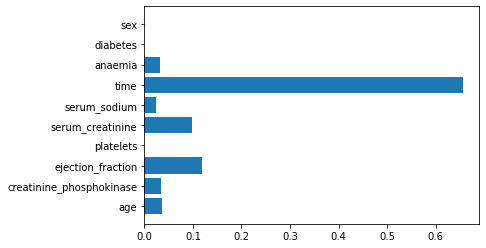

In [78]:
# get importance of each feature 
importance = DT.feature_importances_
# summarize feature importance
i=0
for col in X1.columns:
    #print(col,importance[i])
    print(col,'Score: %.5f' % (importance[i]))
    i=i+1
plt.barh(X1.columns,importance)

age Score: 0.07791
creatinine_phosphokinase Score: 0.09489
ejection_fraction Score: 0.11062
platelets Score: 0.08781
serum_creatinine Score: 0.13873
serum_sodium Score: 0.05275
time Score: 0.40953
anaemia Score: 0.01280
diabetes Score: 0.00496
sex Score: 0.01000


<BarContainer object of 10 artists>

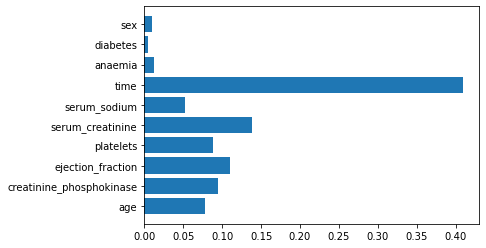

In [79]:
# get importance of each feature 
importance = RF.feature_importances_
# summarize feature importance
i=0
for col in X1.columns:
    #print(col,importance[i])
    print(col,'Score: %.5f' % (importance[i]))
    i=i+1
plt.barh(X1.columns,importance)

age Score: 0.03632
creatinine_phosphokinase Score: 0.08583
ejection_fraction Score: 0.09110
platelets Score: 0.24067
serum_creatinine Score: 0.05942
serum_sodium Score: 0.11963
time Score: 0.33857
anaemia Score: 0.00796
diabetes Score: 0.00000
sex Score: 0.02051


<BarContainer object of 10 artists>

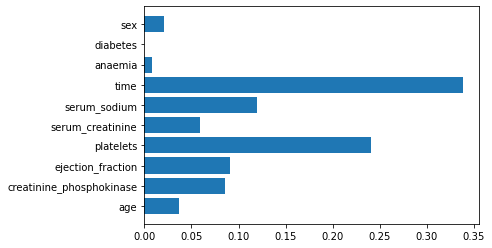

In [80]:
# get importance of each feature 
importance = AB.feature_importances_
# summarize feature importance
i=0
for col in X1.columns:
    #print(col,importance[i])
    print(col,'Score: %.5f' % (importance[i]))
    i=i+1
plt.barh(X1.columns,importance)

In [81]:
# Split data before boosting
y = df['DEATH_EVENT'].to_numpy()
X = df.drop(['DEATH_EVENT'], axis=1).to_numpy()

print(X.shape, y.shape)

(299, 12) (299,)


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=4),
                   n_estimators=4, random_state=1)
The accuracy of model AdaBoostClassifier is 0.92
Accuracy on train set: 1.00
Accuracy on test set: 0.92
              precision    recall  f1-score   support

           0       0.97      0.90      0.94        40
           1       0.83      0.95      0.88        20

    accuracy                           0.92        60
   macro avg       0.90      0.93      0.91        60
weighted avg       0.92      0.92      0.92        60



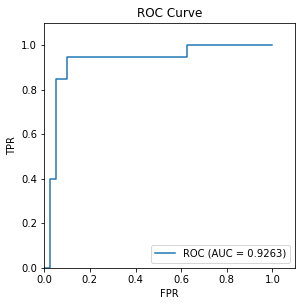



RandomForestClassifier(max_depth=13, n_estimators=15, random_state=1)
The accuracy of model RandomForestClassifier is 0.83
Accuracy on train set: 1.00
Accuracy on test set: 0.83
              precision    recall  f1-score   support

           0       0.89      0.85      0.87        40
           1       0.73      0.80      0.76        20

    accuracy                           0.83        60
   macro avg       0.81      0.82      0.82        60
weighted avg       0.84      0.83      0.84        60



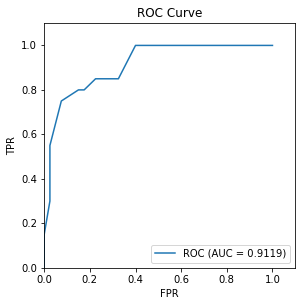



DecisionTreeClassifier(max_depth=4, random_state=1)
The accuracy of model DecisionTreeClassifier is 0.83
Accuracy on train set: 0.91
Accuracy on test set: 0.83
              precision    recall  f1-score   support

           0       0.86      0.90      0.88        40
           1       0.78      0.70      0.74        20

    accuracy                           0.83        60
   macro avg       0.82      0.80      0.81        60
weighted avg       0.83      0.83      0.83        60



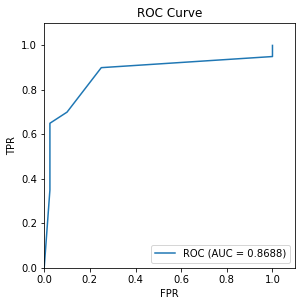

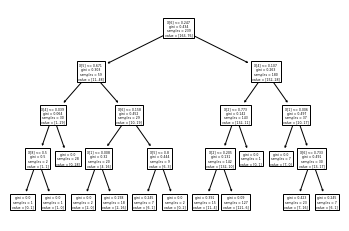

In [82]:
DT= DecisionTreeClassifier(random_state=RANDOM_STATE, criterion="gini",max_depth= 4) # using the random state for reproducibility
AB= AdaBoostClassifier(DecisionTreeClassifier(max_depth= 4),n_estimators= 4,random_state=RANDOM_STATE)
RF= RandomForestClassifier(n_estimators=15, random_state=RANDOM_STATE,criterion='gini',max_depth=13)


# now, create a list with the models 
models= [AB,RF,DT]

for model in models:
    print(model)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)# selected split 80:20
    model.fit(X_train, y_train)
    y_pred= model.predict(X_test) # then predict on the test set
    accuracy= accuracy_score(y_test, y_pred) # this gives us how often the algorithm predicted correctly
    clf_report= classification_report(y_test, y_pred) # with the report, we have a bigger picture, with precision and recall for each class
    print(f"The accuracy of model {type(model).__name__} is {accuracy:.2f}")
    score = model.score(X_train, y_train)
    print('Accuracy on train set: {:.2f}'.format(score))
    score = model.score(X_test, y_test)
    print('Accuracy on test set: {:.2f}'.format(score))
    print(clf_report)
    proba = model.predict_proba(X_test)
    fpr, tpr, threshold = roc_curve(y_test, proba[:, 1])
    auc_score = roc_auc_score(y_test, proba[:, 1])
    plt.figure(figsize=(4.5, 4.5))
    plt.xlim(0., 1.1)
    plt.ylim(0., 1.1)
    plt.plot(fpr, tpr, label='ROC (AUC = %0.4f)' % auc_score)
    plt.legend(loc='lower right')
    plt.title("ROC Curve")
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.show()
    print("\n")
tree.plot_tree(model)
plt.show()
